##ISSCC “Code-a-Chip” Travel Grant Awards submission 
#Team
|Name|University|e-mail|
|:--:|:--------:|:------:|
|Sabari Kannan Muthalagu|University of Freiburg, Germany|msabarikannan@gmail.com|
|Mouliha Sree Subbian Veluswaami|University of Freiburg, Germany|moulihasree@gmail.com|

#Design
A chip design for a programmable IC with 4 logic gates is designed using OpenLane (with Apache-2.0 license).
The design consists of,
1.   4 sel pins, to program the IC by pulling it to low or high voltage.
2.   4 logic gates as follows,
*   Logic gate 1: inputs are in_A and in_B. Output is out_AB
*   Logic gate 1: inputs are in_C and in_D. Output is out_CD
*   Logic gate 1: inputs are in_E and in_F. Output is out_EF
*   Logic gate 1: inputs are in_G and in_H. Output is out_GH

#Block diagram
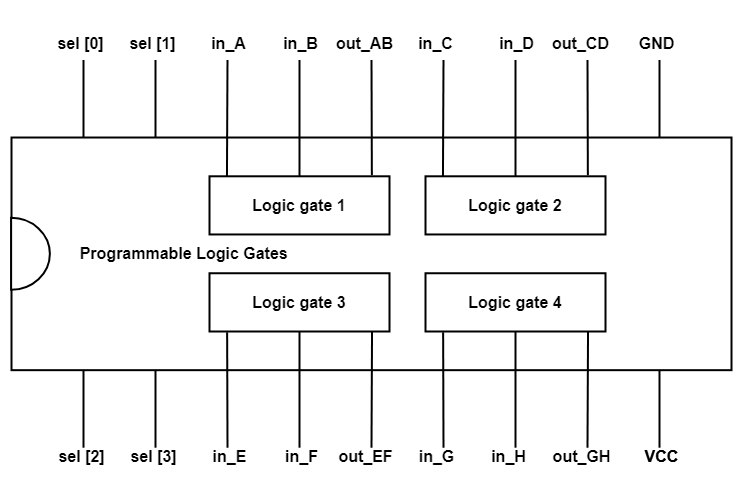


#Programming
The 4 logic gates can be programmed by setting the following logic levels on the sel (select) pins.

|sel[0]|sel[1]|sel[2]|sel[3]|Logic gate 1|Logic gate 2|Logic gate 3|Logic gate 4|
|:--:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|0|0|0|0|AND gate|AND gate|AND gate|AND gate|
|0|0|0|1|OR gate|OR gate|OR gate|OR gate|
|0|0|1|0|NOT gate|NOT gate|NOT gate|NOT gate|
|0|0|1|1|BUFFER|BUFFER|BUFFER|BUFFER|
|0|1|0|0|NOR gate|NOR gate|NOR gate|NOR gate|
|0|1|0|1|NAND gate|NAND gate|NAND gate|NAND gate|
|0|1|1|0|XOR gate|XOR gate|XOR gate|XOR gate|
|0|1|1|1|XNOR gate|XNOR gate|XNOR gate|XNOR gate|
|1|0|0|0|AND gate|AND gate|OR gate|OR gate|
|1|0|0|1|NOT gate|NOT gate|BUFFER|BUFFER|
|1|0|1|0|NAND gate|NAND gate|NOR gate|NOR gate|
|1|0|1|1|XOR gate|XOR gate|XNOR gate|XNOR gate|
|1|1|0|0|AND gate|AND gate|NAND gate|NAND gate|
|1|1|0|1|OR gate|NOR gate|XOR gate|XNOR gate|
|1|1|1|0|NOR gate|NAND gate|XOR gate|XNOR gate|
|1|1|1|1|AND gate|OR gate|NOT gate|BUFFER|

While using NOT gate or BUFFER only inputs in_A, in_C, in_E and in_G are accepted as inputs.




In [ ]:
#@title Install dependencies {display-mode: "form"}
#@markdown - Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda). Install dependencies code re-used from the inverter example.

openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel conda-forge \
                     gdstk

env: CONDA_PREFIX=/content/conda-env
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: LD_LIBRARY_PATH=/content/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env
  Package                             Version  Build                 Channel                 Size
───────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
───────────────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                         0

In [ ]:
%%writefile programmable_logic_gates.v
module programmable_logic_gates (	
	input wire [3:0] sel,
	input wire in_A, in_B, in_C, in_D, in_E, in_F, in_G, in_H,
    output wire out_AB, out_CD, out_EF, out_GH 
	);
	
	always @ (in_A, in_B, in_C, in_D, in_E, in_F, in_G, in_H, sel) begin
	
		case(sel)
		
			4'b0000:	//4 AND gates
			begin
				out_AB <= (in_A & in_B);	//AND gate
				out_CD <= (in_C & in_D);	//AND gate
				out_EF <= (in_E & in_F);	//AND gate
				out_GH <= (in_G & in_H);	//AND gate
			end
			
			4'b0001:	//4 OR gates
			begin
				out_AB <= (in_A | in_B);	//OR gate
				out_CD <= (in_C | in_D);	//OR gate
				out_EF <= (in_E | in_F);	//OR gate
				out_GH <= (in_G | in_H);	//OR gate
			end
			
			4'b0010:	//4 NOT gates
			begin
				out_AB <= !in_A;	//NOT gate
				out_CD <= !in_C;	//NOT gate
				out_EF <= !in_E;	//NOT gate
				out_GH <= !in_G;	//NOT gate
			end
			
			4'b0011:	//4 BUFFER
			begin
				out_AB <= in_A;	//BUFFER
				out_CD <= in_C;	//BUFFER
				out_EF <= in_E;	//BUFFER
				out_GH <= in_G;	//BUFFER
			end
			
			4'b0100:	//4 NOR gates
			begin
				out_AB <= ~(in_A | in_B);	//NOR gate
				out_CD <= ~(in_C | in_D);	//NOR gate
				out_EF <= ~(in_E | in_F);	//NOR gate
				out_GH <= ~(in_G | in_H);	//NOR gate
			end
			
			
			4'b0101:	//4 NAND gates
			begin
				out_AB <= ~(in_A & in_B);	//NAND gate
				out_CD <= ~(in_C & in_D);	//NAND gate
				out_EF <= ~(in_E & in_F);	//NAND gate
				out_GH <= ~(in_G & in_H);	//NAND gate
			end
			
			4'b0110:	//4 XOR gates
			begin
				out_AB <= (in_A ^ in_B);	//XOR gate
				out_CD <= (in_C ^ in_D);	//XOR gate
				out_EF <= (in_E ^ in_F);	//XOR gate
				out_GH <= (in_G ^ in_H);	//XOR gate
			end
			
			4'b0111:	//4 XNOR gates
			begin
				out_AB <= ~(in_A ^ in_B);	//XNOR gate
				out_CD <= ~(in_C ^ in_D);	//XNOR gate
				out_EF <= ~(in_E ^ in_F);	//XNOR gate
				out_GH <= ~(in_G ^ in_H);	//XNOR gate
			end
			
			4'b1000:	//2 AND, 2 OR gates
			begin
				out_AB <= (in_A & in_B);	//AND gate
				out_CD <= (in_C & in_D);	//AND gate
				out_EF <= (in_E | in_F);	//OR gate
				out_GH <= (in_G | in_H);	//OR gate
			end
			
			4'b1001:	//2 NOT gates, 2 BUFFER
			begin
				out_AB <= !in_A;	//NOT gate
				out_CD <= !in_C;	//NOT gate
				out_EF <= in_E;		//BUFFER
				out_GH <= in_G;		//BUFFER
			end
			
			4'b1010:	//2 NAND, 2 NOR gates
			begin
				out_AB <= (in_A ^ in_B);	//XOR gate
				out_CD <= (in_C ^ in_D);	//XOR gate
				out_EF <= (in_E ^ in_F);	//XOR gate
				out_GH <= (in_G ^ in_H);	//XOR gate
			end
			
			4'b1011:	//2 XOR, 2 XNOR gates
			begin
				out_AB <= (in_A ^ in_B);	//XOR gate
				out_CD <= (in_C ^ in_D);	//XOR gate
				out_EF <= ~(in_E ^ in_F);	//XNOR gate
				out_GH <= ~(in_G ^ in_H);	//XNOR gate
			end
			
			4'b1100:	//2 AND, 2 NAND gates
			begin
				out_AB <= (in_A & in_B);	//AND gate
				out_CD <= (in_C & in_D);	//AND gate
				out_EF <= ~(in_E & in_F);	//NAND gate
				out_GH <= ~(in_G & in_H);	//NAND gate
			end
			
			4'b1101:	//1 OR, 1 NOR, 1 XOR, 1 XNOR gates
			begin
				out_AB <= (in_A | in_B);	//OR gate
				out_CD <= ~(in_C | in_D);	//NOR gate
				out_EF <= (in_E ^ in_F);	//XOR gate
				out_GH <= ~(in_G ^ in_H);	//XNOR gate
			end
			
			4'b1110:	//1 NOR, 1 NAND, 1 XOR, 1 XNOR gates
			begin
				out_AB <= ~(in_A | in_B);	//NOR gate
				out_CD <= ~(in_C & in_D);	//NAND gate
				out_EF <= (in_E ^ in_F);	//XOR gate
				out_GH <= ~(in_G ^ in_H);	//XNOR gate
			end
			
			4'b1111:	//1 AND, 1 OR, 1 NOT gates and 1BUFFER
			begin
				out_AB <= (in_A & in_B);	//AND gate
				out_CD <= (in_C | in_D);	//OR gate
				out_EF <= !in_E;			//NOT gate
				out_GH <= in_G;				//BUFFER
			end
		
		endcase
	
	end

endmodule


Overwriting programmable_logic_gates.v


In [ ]:
%%writefile pin_order.cfg
#N
sel.*

#S
out_AB
out_CD
out_EF
out_GH

#E
in_E
in_F
in_G
in_H

#W
in_A
in_B
in_C
in_D

Writing pin_order.cfg


In [ ]:
%%writefile config.json
{
    "DESIGN_NAME": "programmable_logic_gates",
    "VERILOG_FILES": "dir::programmable_logic_gates.v",
    "CLOCK_TREE_SYNTH": false,
    "CLOCK_PORT": null,
    "PL_RANDOM_GLB_PLACEMENT": true,
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 100 100",
	  "FP_PIN_ORDER_CFG": "dir::pin_order.cfg",
    "FP_PDN_AUTO_ADJUST": false
}

Writing config.json


In [ ]:
%env PDK=sky130A
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2022.11.12_3_g1298859-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: not enough values to unpack (expected 3, got 1)
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 0059588eebfc704681dc2368bd1d33d96281d10f)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]:

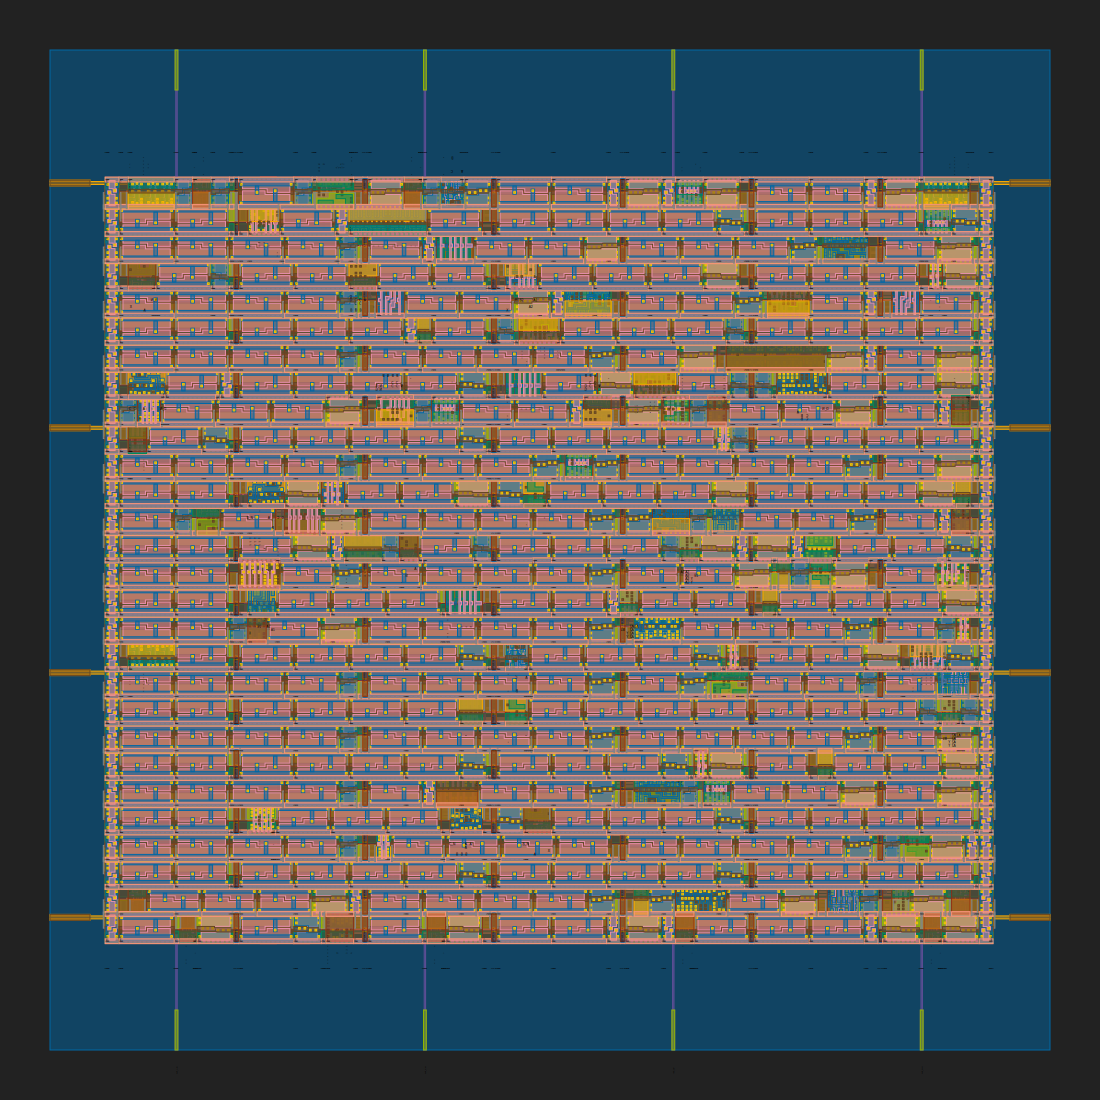

In [ ]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('programmable_logic_gates.svg')
IPython.display.SVG('programmable_logic_gates.svg')

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content
design_name,programmable_logic_gates
config,RUN_2022.11.24_08.25.07
flow_status,flow completed
total_runtime,0h0m46s0ms
routed_runtime,0h0m30s0ms
(Cell/mm^2)/Core_Util,15000.0
DIEAREA_mm^2,0.01
CellPer_mm^2,7500.0
OpenDP_Util,-1
